In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime as dt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import timeit
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [2]:
# import and Read data 
database = 'C:\\Users\\Lenovo\\Downloads\\datasets\\database.sqlite'
conn = sqlite3.connect(database)

In [3]:
query = "SELECT name as TablasBD FROM sqlite_master WHERE type='table';"
table_soccer = pd.read_sql(query, conn)
table_soccer

,TablasBD
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [4]:
df = pd.read_sql("SELECT * FROM Match;", conn)

In [5]:
df.shape

(25979, 115)

In [6]:
# a owerview of our dataset 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,25979.0,1.299000e+04,7499.635658,1.00,6495.50,12990.0,19484.50,25979.0
country_id,25979.0,1.173863e+04,7553.936759,1.00,4769.00,10257.0,17642.00,24558.0
league_id,25979.0,1.173863e+04,7553.936759,1.00,4769.00,10257.0,17642.00,24558.0
stage,25979.0,1.824277e+01,10.407354,1.00,9.00,18.0,27.00,38.0
match_api_id,25979.0,1.195429e+06,494627.856527,483129.00,768436.50,1147511.0,1709852.50,2216672.0
...,...,...,...,...,...,...,...,...
GBD,14162.0,3.648189e+00,0.867440,1.45,3.20,3.3,3.75,11.0
GBA,14162.0,4.353097e+00,3.010189,1.12,2.50,3.4,5.00,34.0
BSH,14161.0,2.497894e+00,1.507793,1.04,1.67,2.1,2.62,17.0
BSD,14161.0,3.660742e+00,0.868272,1.33,3.25,3.4,3.75,13.0


In [7]:
# a owerview of our dataset 
df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


## cleaning data 

In [10]:
# choosing the attribiutes that we need 
columns = ['id','country_id', 'league_id', 'stage', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 
           'home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 
           'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 
           'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA' ]


In [9]:
df.isna().any().sum()

104

In [16]:
X = df[columns]

In [17]:
X.dropna(subset = columns, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
X.shape

(2756, 39)

In [19]:
X.isna().any().sum()

0

In [22]:
# define a function to determine the result of match with binary 
def matchresult(homeScore, awayScore):
    if(homeScore > awayScore):
        return 1
    elif(homeScore < awayScore):
        return 2
    else:
        return 0

In [23]:
#Discard the features, so as not to impair the accuracy of the model
X = X.drop(['id', 'country_id', 'league_id', 'stage', 'match_api_id',
       'home_team_api_id', 'away_team_api_id'], axis=1)

In [24]:
X['result'] = df.apply(lambda r: matchresult(r['home_team_goal'], r['away_team_goal']), axis=1)
y = X['result']
#Discard the features, so as not to impair the accuracy of the model
X = X.drop('result',1)
X = X.drop('home_team_goal',1)
X = X.drop('away_team_goal',1)

In [26]:
y.head(3)

997    2
998    1
999    2
Name: result, dtype: int64

#### implemention of Algorithm 

In [27]:
xtrain3,xtest3, ytrain3,ytest3 = train_test_split(X,y,test_size = 0.40, random_state= 41)
model = RandomForestClassifier()
model.fit(xtrain3 ,ytrain3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
score = model.score(xtest3, ytest3)
score

0.4741613780598368

### Features importance for third examination

In [30]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


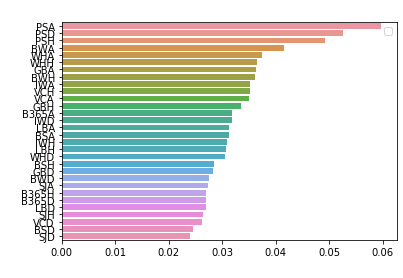

In [31]:
# Represent the most representative characteristics for the model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', color = "white")
plt.ylabel('Features', color = "white")
plt.title("Visualizing Important Features", color = "white")
plt.legend()
plt.show()

In [32]:
def Evaluation_Models(X, y):
   
    #Name of the different classification algorithms used in the tests
    names = ["Decision Tree", "Random Forest",  "AdaBoost", "Naive Bayes"]

    classifiers = [
        
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GaussianNB(),
        ]
    X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X, y, test_size=.40, random_state=0)
    
    # Iterar sobre clasificadores
    for name, clf in zip(names, classifiers):
        clf.fit(X_train_N, y_train_N)
        score = clf.score(X_test_N, y_test_N)
   
        print("%s: \n   %f" % (name, score))

In [33]:
Evaluation_Models(X, y)

Decision Tree: 
   0.419764
Random Forest: 
   0.495920
AdaBoost: 
   0.495920
Naive Bayes: 
   0.418858


In [34]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(xtrain3, ytrain3) 
y_pred = clf.predict(xtest3)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest3, y_pred))

Accuracy: 0.5131459655485041
